# Importando bibliotecas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Analisando estrutura do dataset

In [2]:
avengers = pd.read_csv('avengers.csv', encoding = 'ISO-8859-1')

avengers.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,Death1,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,YES,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


In [3]:
print(f'O dataset possui {avengers.shape[0]} linhas e {avengers.shape[1]} colunas')

O dataset possui 173 linhas e 21 colunas


In [4]:
avengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   URL                          173 non-null    object
 1   Name/Alias                   163 non-null    object
 2   Appearances                  173 non-null    int64 
 3   Current?                     173 non-null    object
 4   Gender                       173 non-null    object
 5   Probationary Introl          15 non-null     object
 6   Full/Reserve Avengers Intro  159 non-null    object
 7   Year                         173 non-null    int64 
 8   Years since joining          173 non-null    int64 
 9   Honorary                     173 non-null    object
 10  Death1                       173 non-null    object
 11  Return1                      69 non-null     object
 12  Death2                       17 non-null     object
 13  Return2                      16 non

In [5]:
avengers.isna().sum()

URL                              0
Name/Alias                      10
Appearances                      0
Current?                         0
Gender                           0
Probationary Introl            158
Full/Reserve Avengers Intro     14
Year                             0
Years since joining              0
Honorary                         0
Death1                           0
Return1                        104
Death2                         156
Return2                        157
Death3                         171
Return3                        171
Death4                         172
Return4                        172
Death5                         172
Return5                        172
Notes                           98
dtype: int64

In [6]:
avengers.fillna({'Return1': 'NO'}, inplace = True)

In [7]:
avengers[['Death1', 'Return1']] = avengers[['Death1', 'Return1']].replace({'YES': 1, 'NO': 0})

In [8]:
avengers.describe()

,Appearances,Year,Years since joining,Death1,Return1
count,173.000000,173.000000,173.000000,173.000000,173.000000
mean,414.052023,1988.445087,26.554913,0.398844,0.265896
std,677.991950,30.374669,30.374669,0.491082,0.443092
min,2.000000,1900.000000,0.000000,0.000000,0.000000
25%,58.000000,1979.000000,5.000000,0.000000,0.000000
50%,132.000000,1996.000000,19.000000,0.000000,0.000000
75%,491.000000,2010.000000,36.000000,1.000000,1.000000
max,4333.000000,2015.000000,115.000000,1.000000,1.000000


# Análise exploratória (EDA)

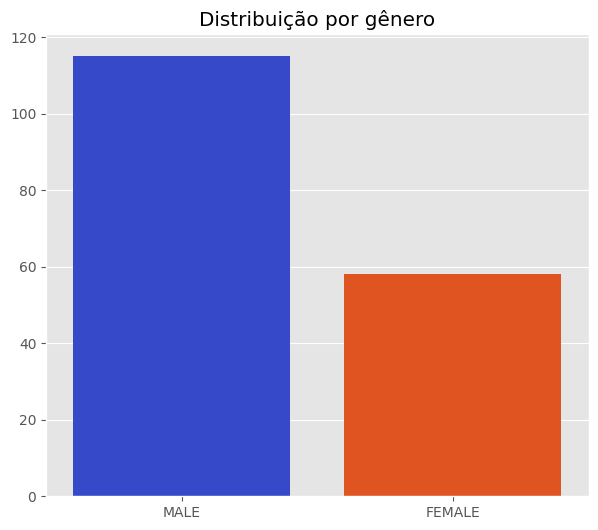

In [9]:
strong_palette = sns.color_palette(['#1D38E2', '#FF4500'])

plt.figure(figsize = (7, 6))

sns.countplot(x = 'Gender', data = avengers, palette = strong_palette)
plt.title('Distribuição por gênero')
plt.xlabel('')
plt.ylabel('')

plt.show()

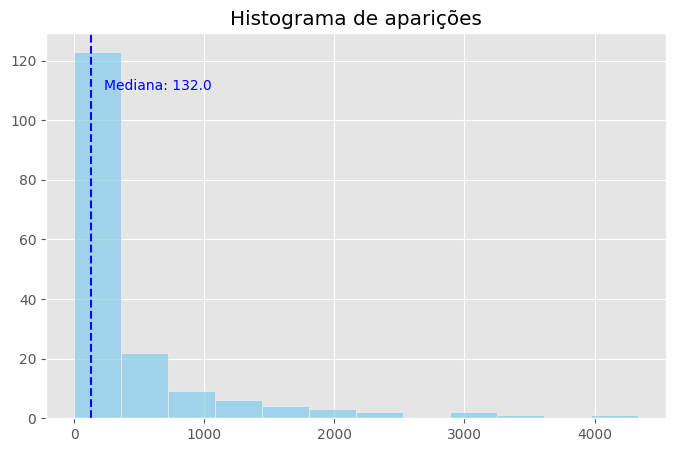

In [10]:
median = np.median(avengers['Appearances'])

plt.figure(figsize = (8, 5))

sns.histplot(x = 'Appearances', bins = 12, data = avengers, color = 'skyblue')
plt.title('Histograma de aparições')
plt.xlabel('')
plt.ylabel('')

plt.axvline(median, color = 'blue', linestyle = '--', label = f'Mediana: {median:.2f}')
plt.text(median + 100, 110, f'Mediana: {median}', color = 'blue', fontsize = 10)

plt.show()

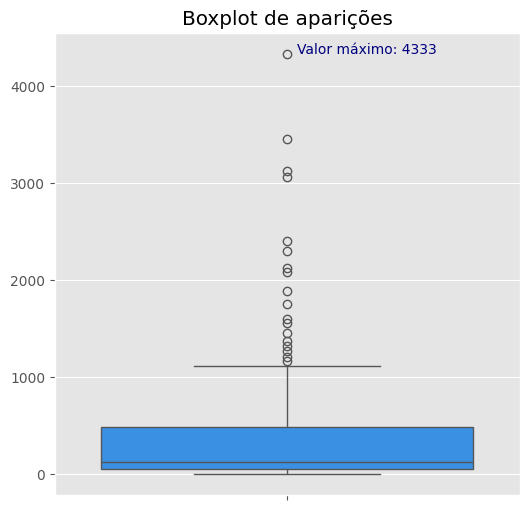

In [11]:
max = np.max(avengers['Appearances'])

plt.figure(figsize = (6, 6))

sns.boxplot(y = 'Appearances', data = avengers, color = 'dodgerblue')
plt.title('Boxplot de aparições')
plt.xlabel('')
plt.ylabel('')

#plt.axvline(max, color = 'blue', linestyle = '--', label = f'Máximo: {max:.2f}')
plt.text(0.02, max, f'Valor máximo: {max}', color = 'navy', fontsize = 10)

plt.show()

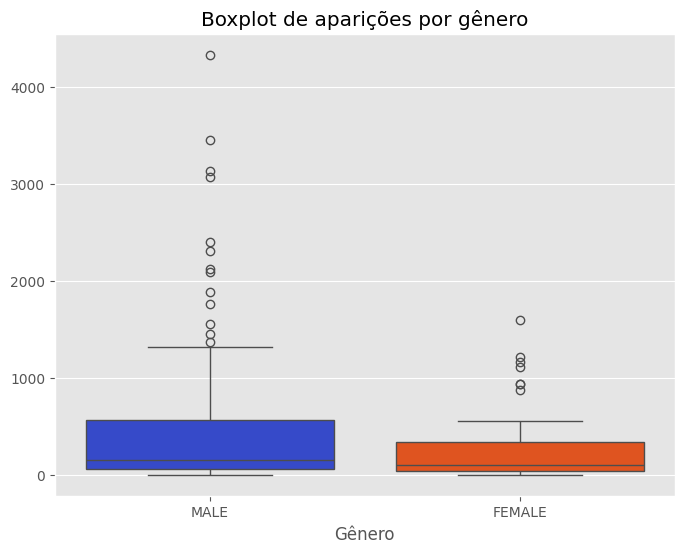

In [12]:
plt.figure(figsize = (8, 6))

sns.boxplot(y = 'Appearances', x = 'Gender', data = avengers, palette = strong_palette)
plt.title('Boxplot de aparições por gênero')
plt.xlabel('Gênero')
plt.ylabel('')

plt.show()

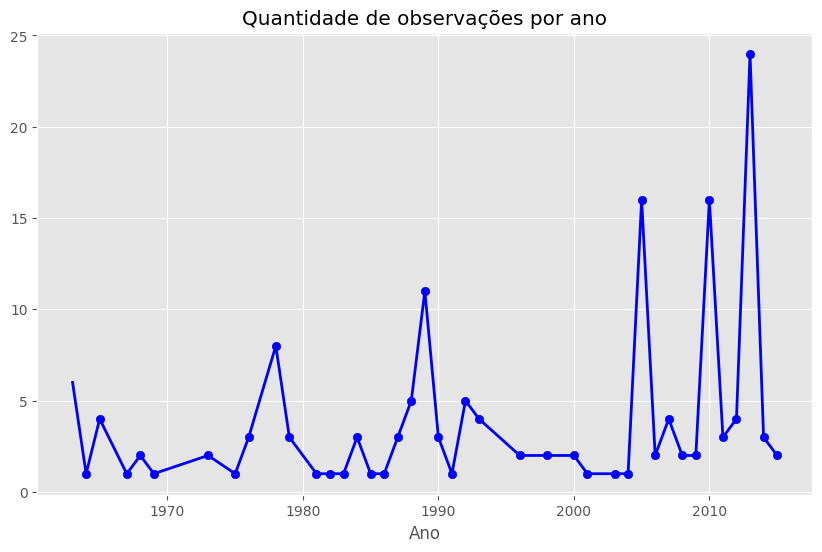

In [13]:
year_counts = avengers['Year'].value_counts().sort_index()

year_counts = year_counts[year_counts.index >= 1939]

mean = np.mean(year_counts.values)

plt.figure(figsize = (10, 6))

sns.lineplot(x = year_counts.index, y = year_counts.values, color = 'blue', linewidth = 2)
plt.title('Quantidade de observações por ano')
plt.xlabel('Ano')
plt.ylabel('')

for i in range(1, len(year_counts)):
    plt.scatter(year_counts.index[i], year_counts.values[i], color = 'blue', zorder = 3)

plt.show()

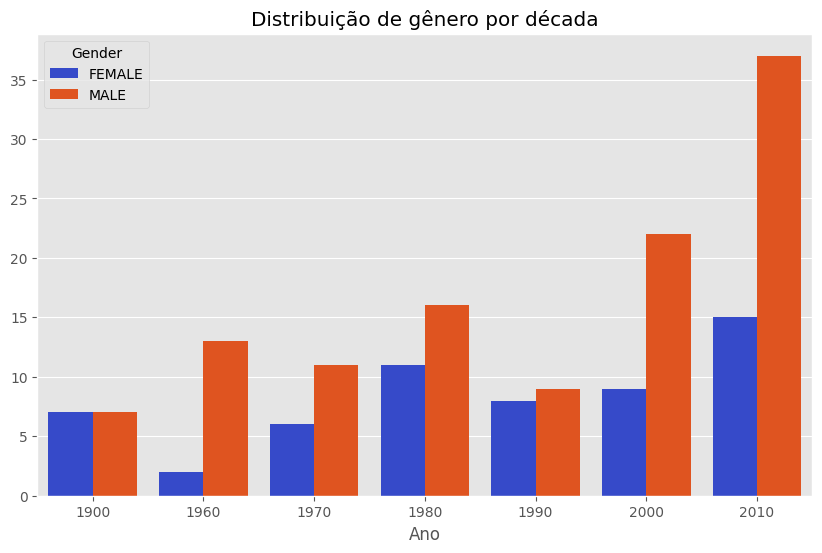

In [14]:
avengers['decade'] = (avengers['Year'] // 10) * 10

gender_by_decade = avengers.groupby(['decade', 'Gender']).size().reset_index(name = 'count')

plt.figure(figsize = (10, 6))

sns.barplot(x = 'decade', y = 'count', hue = 'Gender', data = gender_by_decade, palette = strong_palette)
plt.title('Distribuição de gênero por década')
plt.xlabel('Ano')
plt.ylabel('')

plt.show()

Notamos que o número de personagens que fazem parte do Vingadores vinha crescendo ao longo dos anos, mas teve uma queda nos anos de 2000 e 2010. Iso pode ter ocorrido por uma queda no consumo de quadrinhos ou ter sido uma escolha da Marvel de não lançar quadrinhos sobre os Vingadores. Após essa queda, o crescimento dos personagens do gênero masculino na década seguinte foi muito maior que do gênero feminino.

In [22]:
cross_table = pd.crosstab(avengers['Gender'], avengers['Honorary'], normalize = 'columns')

cross_table

Honorary,Academy,Full,Honorary,Probationary
Gender,,,,
FEMALE,0.529412,0.311594,0.375,0.0
MALE,0.470588,0.688406,0.625,1.0


Para os vingadores da classe Academy, temos 52,94% sendo do gênero feminino e 47,05% sendo masculino. Já no Full e Honorary, existe uma concentração maior no gênero masculino

In [26]:
cross_table = pd.crosstab(avengers['Gender'], avengers['Honorary'], normalize = 'index')

cross_table

Honorary,Academy,Full,Honorary,Probationary
Gender,,,,
FEMALE,0.155172,0.741379,0.103448,0.000000
MALE,0.069565,0.826087,0.086957,0.017391


Nessa perspectiva vemos que a maioria dos vingadores do gênero feminino estão em Full, seguido de Academy e Honorary. Já para os personagens do gênero masculino, a concentração em Full é ainda maior e o segundo valor de honorary mais frequente é Honorary, diferente do que vimos para o gênero feminino

In [27]:
cross_table = pd.crosstab(avengers['Gender'], avengers['Death1'], normalize = 'columns')

cross_table

Death1,0,1
Gender,,
FEMALE,0.355769,0.304348
MALE,0.644231,0.695652


Podemos observar que os Vingadores do gênero masculino tem uma participação maior tanto em cenas em que morrem e cenas em que não morrem, o que já era de se esperar pois a quantidade de personagens de gênero masculino é quase o dobro que personagens do gênero feminino.

In [28]:
cross_table = pd.crosstab(avengers['Gender'], avengers['Death1'], normalize = 'index')

cross_table

Death1,0,1
Gender,,
FEMALE,0.637931,0.362069
MALE,0.582609,0.417391


Agora olhando para cada gênero separadamente conseguimos dizer que a maioria dos personagens não morrem nas cenas, e que personagens do gênero feminino tem um percentual maior de não mortes.

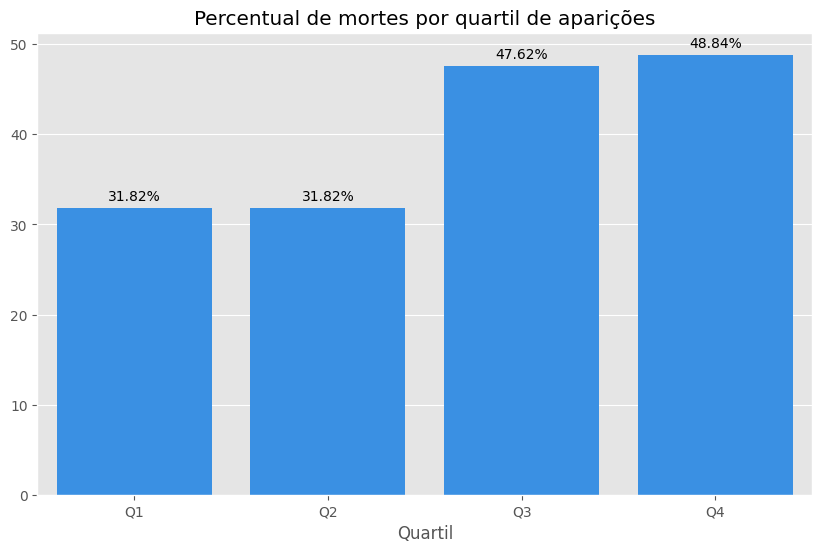

In [44]:
avengers['quartile'] = pd.qcut(avengers['Appearances'], q = 4, labels = ['Q1', 'Q2', 'Q3', 'Q4'])

death_by_quartile = avengers.groupby('quartile')['Death1'].mean() * 100

plt.figure(figsize = (10, 6))

sns.barplot(x = death_by_quartile.index, y = death_by_quartile.values, color = 'dodgerblue')
plt.title('Percentual de mortes por quartil de aparições')
plt.xlabel('Quartil')
plt.ylabel('')

for i, v in enumerate(death_by_quartile.values):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha = 'center', va = 'bottom', fontsize = 10)

plt.show()

Temos que personagens que tem um número de aparições entre 2 e 132 tem um percentual de mortes de 31,82% e persongens com mais de 132 aparições tem um percentual de mais de 47% de mortes

In [51]:
mean_appearances_by_gener_death = avengers.groupby(['Gender', 'Death1'])['Appearances'].mean()

In [52]:
mean_appearances_by_gener_death

Gender  Death1
FEMALE  0         223.081081
        1         334.238095
MALE    0         338.582090
        1         701.520833
Name: Appearances, dtype: float64

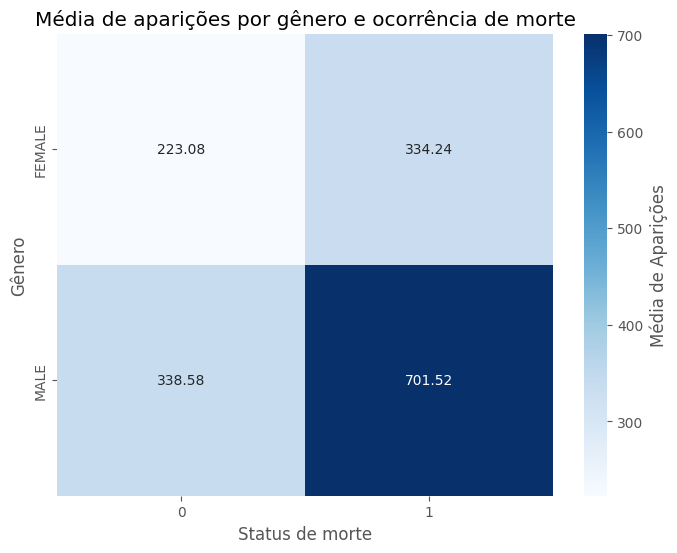

In [66]:
mean_appearances_by_gener_death = pd.crosstab(avengers['Gender'], avengers['Death1'], values =  avengers['Appearances'], aggfunc = 'mean')

plt.figure(figsize=(8, 6))

sns.heatmap(mean_appearances_by_gener_death, annot = True, cmap = 'Blues', fmt = '.2f', cbar_kws = {'label': 'Média de Aparições'})
plt.title('Média de aparições por gênero e ocorrência de morte')
plt.xlabel('Status de morte')
plt.ylabel('Gênero')

plt.show()

Aqui podemos observar que a média de aparições para o gênero feminino não varia muito nos casos em que a personagem morre ou não, já para o gênero masculino notasse uma discrepância na média de aprições, ou seja, personagens do gênero masculino que morrem em alguma cena tem uma média de aparições maior.